<font size=6><b> Lec06. 이미지증강(Image Augmentation)

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [147]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal  #Xavier

In [8]:
(X_train,y_train), (X_val,y_val) = mnist.load_data()
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 모델

In [93]:
model = Sequential()
# ------------- CNN ---------------------
model.add(Conv2D(filters=16, input_shape=(28,28,1), kernel_size=(5,5), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='glorot_uniform')  )
model.add(MaxPool2D(pool_size=(2, 2),                               strides=None  , padding="valid"))
model.add(Conv2D(filters=24, kernel_size=(5,5), activation='relu' ) )
model.add(MaxPool2D(pool_size=(2, 2) ))

# ------------- Fully Connected ---------
model.add(Flatten())

model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# 이미지 증강
* Keras : https://keras.io/ko/preprocessing/image/
* Python PIL : https://ddolcat.tistory.com/690
* OpenCV : https://docs.opencv.org/4.x/

<pre>
<b>(배치 생성)  --> (배치 단위로 루프) --> 학습(fit) 시 순환하면서 데이터 증강 


* generator = <font color=red>ImageDataGenerator</font>( ... 필터속성들 ... )
* <font color=red>iter = generator.flow</font>(X,y, batch_size=N)
  iter = generator.flow_from_directory(path, batch_size=N)
* res = <font color=red>model.fit(iter</font>,  epoch=N, step_per_epoch=len(X_train)/batch_size)

res.차트
model.predict()



In [9]:
from keras.preprocessing.image import ImageDataGenerator

<pre>
<B>keras.preprocessing.image.ImageDataGenerator(
     rotation_range=0,                        회전
     width_shift_range=0.0,                   이미지 밀기(좌우)                  
     height_shift_range=0.0,                  이미지 밀기(상하)
     brightness_range=None,                   밝기
     zca_whitening=False,                     밝기
     zoom_range=0.0,                          확대/축소 
     fill_mode='nearest', cval=0.0,           빈픽셀 채우기          
     horizontal_flip=False,                   가로 대칭
     vertical_flip=False,                     세로 대칭
     rescale=None,                            /255.0 
     validation_split=0.0,                    8:2</B>
     featurewise_center=False,                이미지 센터에 위치
     samplewise_center=False,                      
     featurewise_std_normalization=False,     색상정규화
     samplewise_std_normalization=False, 
     zca_epsilon=1e-06, 
     shear_range=0.0,                         0~45 각도내 변환
     channel_shift_range=0.0,                 색상보정
     preprocessing_function=None,             
     data_format=None,                 
     dtype=None)

* ref : https://yerimoh.github.io/DL9/

<pre>
<ul> <li><code class="language-plaintext highlighter-rouge">featurewise_center</code>: Boolean. 입력 평균을 데이터 집합 위에 0으로 설정</li> <li><code class="language-plaintext highlighter-rouge">samplewise_center</code>: Boolean. 각 표본 평균을 0으로 설정</li> <li><code class="language-plaintext highlighter-rouge">featurewise_std_normalization</code>: Boolean. 입력을 데이터 집합(특징맵)의 표준으로 나눔</li> <li><code class="language-plaintext highlighter-rouge">samplewise_std_normalization</code>: Boolean. 각 입력을 표준으로 나눔</li> <li><code class="language-plaintext highlighter-rouge">zca_epsilon</code>: ZCA 미백용 엡실론. 기본값은 1e-6</li> <li><code class="language-plaintext highlighter-rouge">zca_whitening</code>: Boolean. ZCA 화이트닝</li> <li><code class="language-plaintext highlighter-rouge">rotation_range</code>: Int. 무작위 회전에 대한 도(ㅇ) 단위 범위</li> <li><code class="language-plaintext highlighter-rouge">width_shift_range</code>: Float, 이미지를 수평으로 임의로 이동(전체 너비의 대칭)</li> <li><code class="language-plaintext highlighter-rouge">height_shift_range</code>: Float, 이미지를 수직으로 임의로 이동(전체 높이의 대칭)</li> <li><code class="language-plaintext highlighter-rouge">brightness_range</code>: Tuple or list of two floats,밝기 이동 값 선택 범위</li> <li><code class="language-plaintext highlighter-rouge">shear_range</code>: Float, 전단 강도(도 단위로 시계 반대 방향으로 전단 각도)</li> <li><code class="language-plaintext highlighter-rouge">zoom_range</code>: Float or [lower, upper], 무작위 확대/축소 범위입니다. 부동 소수인 경우, [하위, 상한] = [1-dynam_range, 1+dynam_range].</li> <li><code class="language-plaintext highlighter-rouge">channel_shift_range</code>: Float, 무작위 채널 이동 범위</li> <li><code class="language-plaintext highlighter-rouge">fill_mode</code>: One of {“constant”, “nearest”, “reflect” or “wrap”}, “nearest”가 기본 <ul> <li>지정된 모드에 따라 입력 경계를 벗어나는 점이 채워짐</li> <li>constant’: kkkkkkkk[abcd]kkkkkkkk (cval=k)</li> <li>‘nearest’: aaaaaaaa[abcd]dddddddd</li> <li>‘reflect’: abcddcba[abcd]dcbaabcd</li> <li>‘wrap’: abcdabcd[abcd]abcdabcd</li> </ul> </li> <li><code class="language-plaintext highlighter-rouge">cval</code>: Float or Int, 경계를 벗어나는 점에 사용되는 값</li> <li><code class="language-plaintext highlighter-rouge">horizontal_flip</code>: Boolean, 입력을 수평으로 랜덤하게 뒤집음</li> <li><code class="language-plaintext highlighter-rouge">vertical_flip</code>: Boolean. 입력을 수직으로 랜덤하게 뒤집음</li> <li><code class="language-plaintext highlighter-rouge">rescale</code>: 데이터에 제공된 값을 곱함</li> <li><code class="language-plaintext highlighter-rouge">preprocessing_function</code>: 각 입력에 적용될 함수 -&gt; 이미지 크기 조정 및 증강 후에 실행</li> <li><code class="language-plaintext highlighter-rouge">dtype</code>: 생성된 어레이에 사용할 Dtype</li> </ul>

## 수동 원리 이해

In [132]:
(X_train,y_train), (X_val,y_val) = mnist.load_data()
X_train_cp = X_train[:6]
y_train_cp = y_train[:6]

X_train_cp.shape, y_train_cp.shape

((6, 28, 28), (6,))

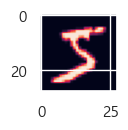

In [133]:
plt.figure(figsize=(1,1))
plt.imshow(X_train_cp[0].reshape(28,28))
plt.show()

In [135]:
datagen = ImageDataGenerator(rotation_range=50)
X_train_cp = X_train_cp.reshape(-1,28,28,1)
print(X_train_cp.shape)

(6, 28, 28, 1)


In [155]:
y_train_cp

array([5, 0, 4, 1, 9, 2], dtype=uint8)

Epoch: 0 
1/1 [==============================] - 0s 7ms/step - loss: 19.3731 - accuracy: 0.0000e+00


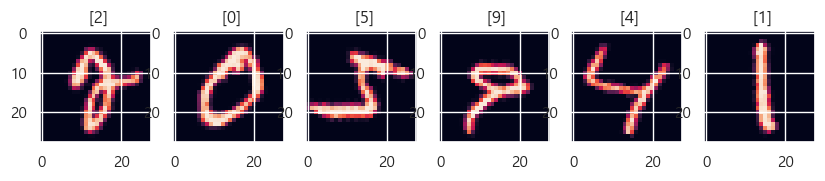

Epoch: 1 
1/1 [==============================] - 0s 8ms/step - loss: 1.2121 - accuracy: 0.0000e+00


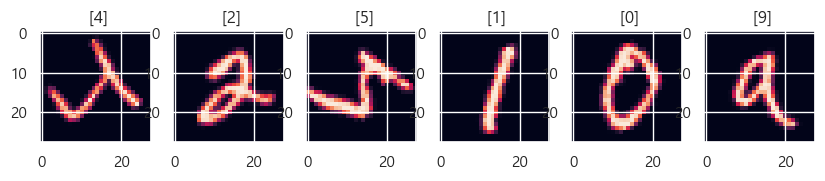

In [164]:
EPOCHS = 2
for e in range(EPOCHS):
    plt.figure(figsize=(10,5))
    
    batches = 0
    print(f"Epoch: {e} ")
    for x_batch, y_batch in datagen.flow(X_train_cp, y_train_cp, batch_size=1):
        model.fit(x_batch, y_batch)
        
        batches += 1 
        
        plt.subplot(1, len(X_train_cp), batches)
        plt.imshow(x_batch.reshape(28,28))
        plt.title(f" {y_batch}")
        
        if batches >= len(X_train_cp) / 1:  #step_per_epoch
            break
    plt.show()    

## 이미지 증강

In [179]:
(X_train,y_train), (X_val,y_val) = mnist.load_data()
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [180]:
X_train = X_train.reshape(-1,28,28,1)
X_val   = X_val.reshape(-1,28,28,1)
X_train.shape, X_val.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [190]:
# your dataset or generator can generate at least `steps_per_epoch * epochs` batches
(60000/ 128 ) * 10

4687.5

In [183]:
train_generator = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.1,  
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True, 
    vertical_flip=False, 
) 

val_generator = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.1,  
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True, 
    vertical_flip=False, 
) 

test_generator = ImageDataGenerator(rescale = 1. /255.) 

BATCH_SIZE = 128
EPOCHS = 10

train_flow_iter = train_generator.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_flow_iter   = val_generator.flow(X_val, y_val, batch_size=BATCH_SIZE)
# test_flow_iter  = test_generator.flow(X_test, y_test, batch_size=BATCH_SIZE)

model.fit(train_flow_iter,
          epochs=EPOCHS,
          steps_per_epoch=len(X_train)/BATCH_SIZE,
          validation_data=val_flow_iter)


Epoch 1/2
234/234 [==============================] - 24s 104ms/step - loss: 0.4728 - accuracy: 0.8480 - val_loss: 0.3796 - val_accuracy: 0.8805
Epoch 2/2
234/234 [==============================] - 25s 106ms/step - loss: 0.3655 - accuracy: 0.8855 - val_loss: 0.2977 - val_accuracy: 0.9062


In [178]:
60000/ 256

234.375

In [6]:
# fit_hisroty = model.fit(X_train_scaler, y_train
#                         , batch_size = 128
#                         , validation_split=0.2, epochs=10)
# print(fit_hisroty)
# print ( model.evaluate(X_test_scaler, y_test)  )

In [ ]:
# plt.figure(figsize=(6,3))
# ax1 = plt.subplot(1,2,1)
# ax1.plot(fit_hisroty.history['loss']    , label='loss')
# ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
# ax1.legend()
# ax1.set_title("loss")

# ax2 = plt.subplot(1,2,2)
# ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
# ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
# ax2.legend()
# ax2.set_title("accuracy")

# plt.show()